## Exploring the hyperdictionary

Now, I've run the hyperdictionary with only 95% of the words taken out! This gives us 5k words and 20k elements in the word tree. I've increased the dimensionality of the hypervector to 1milllion. Lets see how it does. How much information can it store? 


In [3]:

import random_idx
import utils
import pickle

from pylab import *

%matplotlib inline

height has been deprecated.

2016-02-02 13:06


In [4]:
h = np.load('data/hyperdictionary_s20_160202.npz')

In [11]:
hyperdictionary = h['hyperdictionary']
letter_vectors = h['letter_vectors']

print hyperdictionary.shape

N = hyperdictionary.shape[0]

(1000000,)


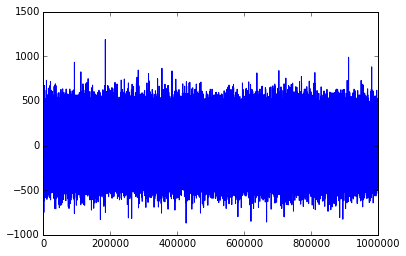

In [12]:
plot(hyperdictionary);

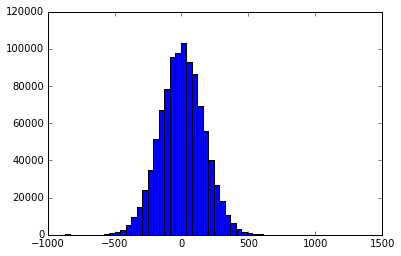

In [13]:
hist(hyperdictionary, 50);

Here is a widget that will display the histogram of the next letter for any string you type. However, you probably cannot run it on the notebook viewer:

In [14]:
def get_next_letters(v, thresh=0.5):
    next_letters = ''
    for idx in np.nonzero(v>thresh)[0]:
        next_letters += random_idx.alphabet[idx]
    return next_letters

'acilnoprv'

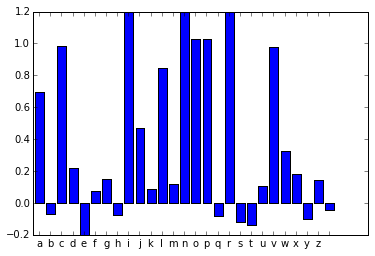

In [15]:
from ipywidgets import widgets
from IPython.display import display
from IPython.html.widgets import *

figure(figsize=(8,5))

def next_letter_hist(instring):
    #instring = sender.value
    subvec = np.ones(N)
    for letter in instring:
        lidx = random_idx.alphabet.find(letter)
        subvec = np.roll(subvec, 1) * letter_vectors[lidx,:]
        
    subvec = np.roll(subvec, 1)
    val = np.dot(letter_vectors/N, subvec*hyperdictionary)
    bar(arange(len(val))+0.15, val)   
    ax=gca()
    ax.set_xticks(arange(len(random_idx.alphabet))+0.5)
    th = ax.set_xticklabels(list(random_idx.alphabet))
    ax.set_ylim([-0.2, 1.2])
    return get_next_letters(val)

#input_text = widgets.Text()
#input_text.on_submit(next_letter_hist)
#display(input_text)

interact(next_letter_hist, instring="")


This dictionary seems to do a good job of storing 95% of the words:

'ey'

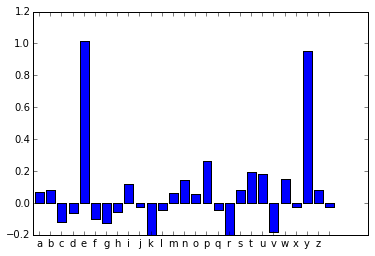

In [17]:
next_letter_hist('x')

'n'

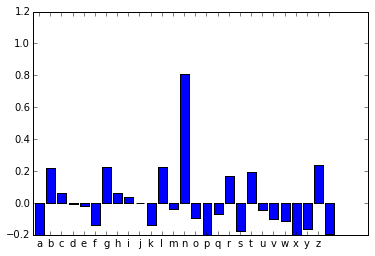

In [18]:
next_letter_hist('xe')

'o'

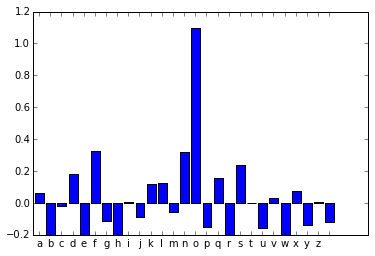

In [19]:
next_letter_hist('xen')

'e'

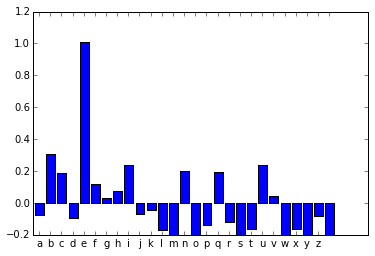

In [20]:
next_letter_hist('xenophob')

'l'

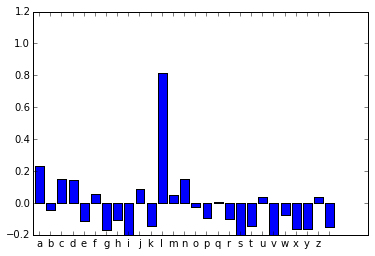

In [21]:
next_letter_hist('xy')

'eo'

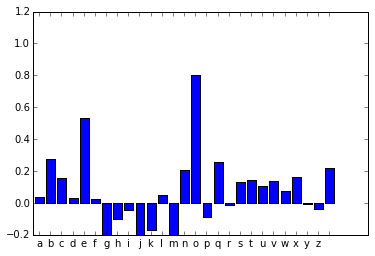

In [22]:
next_letter_hist('xyloph')

''

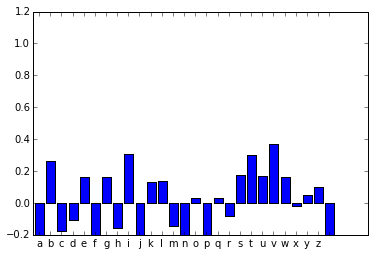

In [23]:
next_letter_hist('xylophon')

doesn't quite get xylophone

''

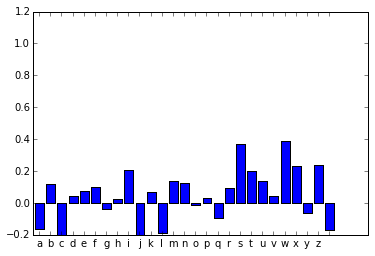

In [25]:
next_letter_hist('xylophe')

'acilnoprv'

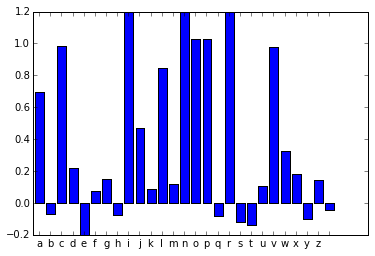

In [26]:
next_letter_hist('sto')

'i'

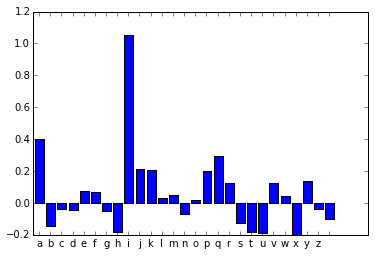

In [27]:
next_letter_hist('stol')

''

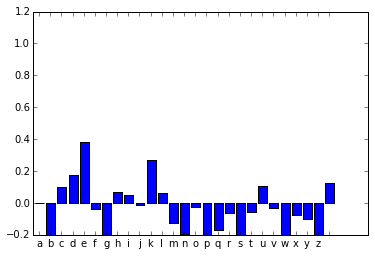

In [28]:
next_letter_hist('stolidness')

haha stolidness? but this is actually a word that was stored in the dictionary.


'l'

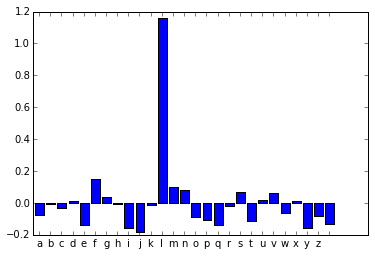

In [29]:
next_letter_hist('stop')

'i'

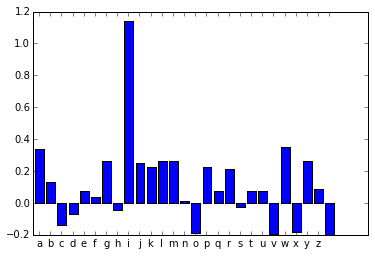

In [30]:
next_letter_hist('stopl')

'g'

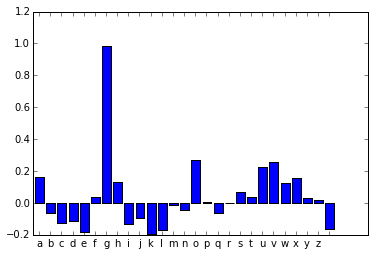

In [31]:
next_letter_hist('stopli')

'h'

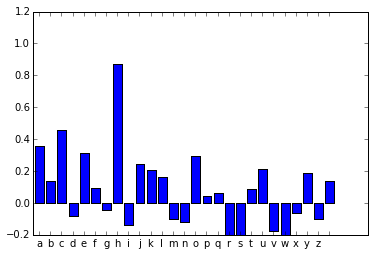

In [32]:
next_letter_hist('stoplig')

't'

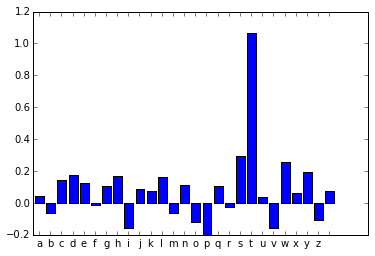

In [33]:
next_letter_hist('stopligh')

''

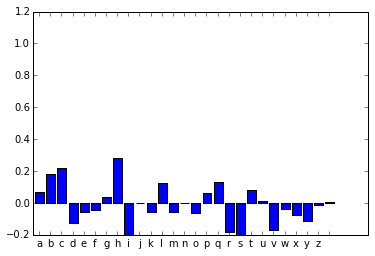

In [34]:
next_letter_hist('stoplight')

Generally, this seems to do pretty well. 